# Task -1 Anomaly detection
## Student ID1: yehonatan amosi 209542349
## Student ID2: eynav ben shlomo 209328970
### some notes: you can install Anaconda (python 3 prefered)
####We will use Pandas, Numpy, and SKLEARN ( they are part of Anaconda distribution)

In [ ]:
!pip install oletools
!pip install openpyxl

In [ ]:
# Imports
# matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

## Read the data

In [ ]:
# file path - this for linux windows you will need "//"
f_path = "/Users/97252/Desktop/task1/conn_attack.csv"
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This fea
ture represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

# # Pandas DataFrame

In [ ]:
# we could have nan values in the dataset (issue in the data) lets dropna()
#This is the data "conn_attack.csv" with its 4 columns: "record ID","duration_", "src_bytes","dst_bytes" and has about 256669 rows(starting from line 0 to line 256668).
#df.head() = Gets the first 5 rows in the data
df.head()

Get the head of the data

In [ ]:
# df.tail()= Gets the last 5 rows in the data
df.tail()

A.  Handling missing data

In [ ]:
# determin the missing data precentage
df.apply(lambda x: sum(x.isna()) / len(df))


B. Remove na/nan: 
##The Pandas function dropna() drops rows or columns (depending on the parameter you choose) that contain missing values. This function takes the axis parameter which you set as 0 to drop rows, and 1 to drop columns.

Please note that:

The alternative function is fillna() . This function will replace missing values with the value of your choice. You can replace with a fixed value such as 0, or you can use a calculation such as the mean. You can also apply different values to different columns by passing a dictionary of values per column.

In [ ]:
#Displays the information to Data
#Number of rows: 256670
#Number of columns: 4
df.shape

In [ ]:
df.isnull().any().any() # check if we have nan values.

In [ ]:
df = df.dropna()


we can see from all above results that there isnt missing nan value. 

The below code fills any missing values with the mode for that column. We used fil when we have features that do not have all placement in all cases.

In [ ]:
df_numeric = df.apply(lambda x: x.fillna(x.mode()),axis=0)

C. Selecting subsets from our data

The loc method selects rows based on the index label. Let’s walk through a quick example.

In [ ]:
df.head()

In [ ]:
number_range = range(0,200)
print(number_range)

In [ ]:
subset_loc = df.loc[number_range]
subset_loc#.head()

The iloc method select rows by the index position. This might be used, for example, if the user does not know the index or if the index is not numeric.


Similar to loc

In [ ]:
subset_iloc = df.iloc[[0, 1, 2]]
subset_iloc.head()

D. DataFrame "Where" The SQL alternative for searching

In [ ]:
df.where(df['src_bytes'] > 240).dropna()

In [ ]:
 # or /use this:
df[df['src_bytes'] > 240]

In [ ]:
#or more complex:
df[(df['src_bytes']> 240) & (df['dst_bytes']> 1000)]

In [ ]:
#The describe() method returns description of the data.
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile, how many of the values are less than the 25  percentile.
#50% - The 50% percentile,  how many of the values are less than the 50  percentile.
#75% - The 75% percentile,  how many of the values are less than the 75  percentile.
#max - the maximum value.
#Can learn a few things from this, such as:
#that in the 0th column not all the rows are 0 despite what can be seen according to the first 5 columns and the last 5 columns.
#The thought is strengthened that the 1st column contains a value that is the value represented by the row plus 2, but it is still impossible to know for sure without doing the necessary calculations
df.describe()

F. Dataset statistics calculations

In [ ]:
#Mean
df['dst_bytes'].mean()

In [ ]:
#Median of two seperate columns
df[["src_bytes", "dst_bytes"]].median()

G. Grouping

In [ ]:
df[["src_bytes", "dst_bytes"]].groupby("src_bytes").std()

In [ ]:
df.groupby(["src_bytes", "dst_bytes"])["duration_"].mean()

In [ ]:
#The nunique() method returns the number of unique values for each column.
df.nunique()

## Q1. Data exploration

### Explore the data, understand the featues, statistics visualize the inputs
#### please try the following tools and extend them: this is for a soft start :) Explain how you explore the data. Why this is important? Please note this are only some examples


skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


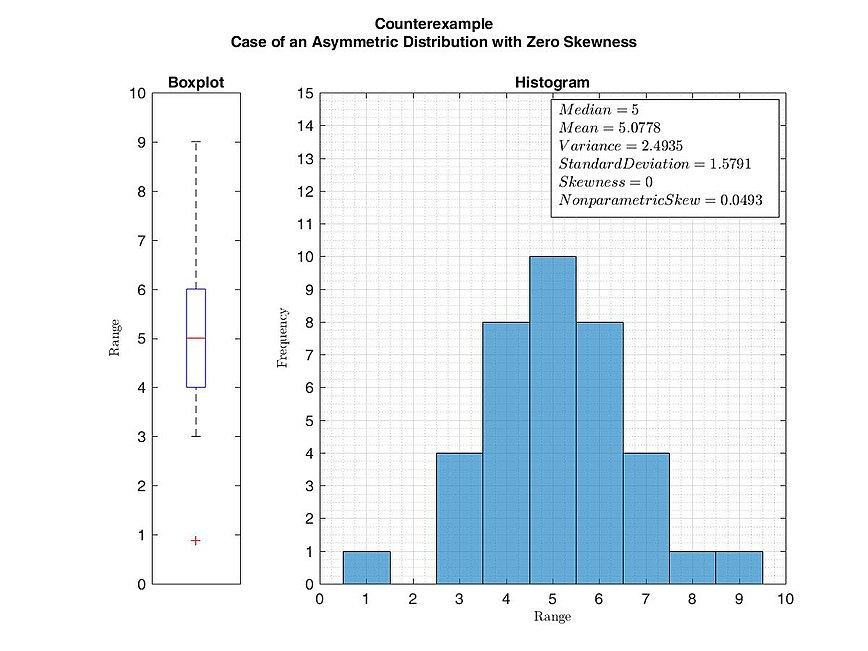

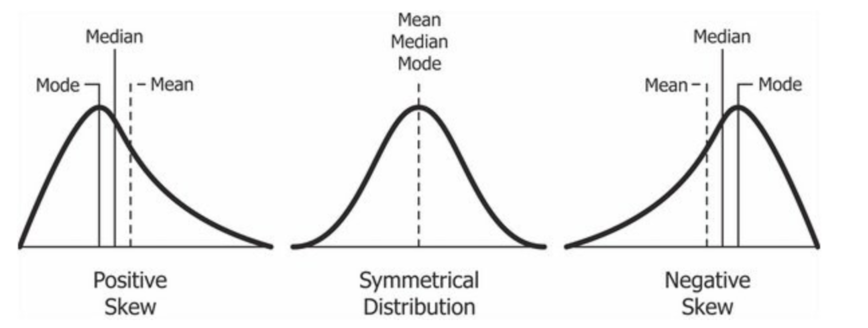

In [ ]:
df.agg(
    {
        "duration_": ["min", "max", "median", "mean","skew"],
        "dst_bytes": ["min", "max", "median", "mean","skew"],
        "src_bytes": ["min", "max", "median", "mean","skew"],
    }
)


In [ ]:
'''
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
'''
#skewness and kurtosis
sns.displot(df['src_bytes'])
print("src_bytes Skewness: %f" % df['src_bytes'].skew())
print("src_bytes Kurtosis: %f" % df['src_bytes'].kurt()) # positive show long tail , negative light tail

In [ ]:

print("dst_bytes Skewness: %f" % df['dst_bytes'].skew())
print("dst_bytes Kurtosis: %f" % df['dst_bytes'].kurt())
sns.displot(df["dst_bytes"])

In [ ]:
#skewness and kurtosis
sns.displot(df['duration_'])
print("duration_ Skewness: %f" % df['duration_'].skew())
print("duration_ Kurtosis: %f" % df['duration_'].kurt()) # positive show long tail , negative light tail

In [ ]:
#Relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,20000)); # do not `assume here any thing this is just examples

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,10000));

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['dst_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='dst_bytes', ylim=(0,4000000));

from the above graphs we can see that we have some isolation points. we can also understand that we will have more than 2 clustaers for the data and also that the mostק Influential feature are "record ID","duration_", "src_bytes","dst_bytes" .
from the above conclusion we decide to check the two algorithems : Isolation Forest and K-Means-Clustring


Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

In [ ]:
df.corr() 

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18})

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['duration_']].sort_values(by='duration_', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18})

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['dst_bytes']].sort_values(by='dst_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});

In [ ]:
core = df.corr()
sns.pairplot(core)

In [ ]:
#relationship between two variables with semantic mappings of subsets
sns.relplot(data=df)

In [ ]:
#show the relationship between categorical variables
sns.catplot(kind='box', data=df)

According to data exploration, the dataset in the file "conn_attack.csv" has 256670 rows and 4 columns record ID, duration_, src_bytes, dst_bytes
From the different graphs and the different analyzes of the data it is possible to conclude that there are some points in isolation that are separated from the blocks of the other points. In addition we have 4 different clustaers for the data.

# Back to the task

Summary of data exploration:

    Did this help you?
    What did you find?
    What the data exploration tell you about the data and the possible attacks?

# Machine Learning Algorithms

Please note that here you have to show AI/ML/DL algorithm. You can't use if else or "as we can see" text approach.\

we will now run few algorithem on our datasets:
1. IsolationForest
2. K means




# 1. IsolationForest

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
contamination = 0.01

data = df.copy()


In [ ]:
data

In [ ]:
data = data.drop(columns  = ["record ID"])

for col in data.columns:
    if data[col].dtype == "objects":
        le = LabelEncoder()
        data[col].fillna("None",inplace=True)
        le.fit(list(data[col].astype(str).value))
        data[col] = le.transform(list(data[col].astype(str).value))
    else:
        data[col].fillna("999",inplace=True)

In [ ]:
data.head(2)

In [ ]:
%%time
model = IsolationForest(contamination=contamination,n_estimators = 1000)
model.fit(data)

In [ ]:
predict = model.predict(data)
df["iforest"] = pd.Series(predict)
df["iforest"] = df["iforest"].map({1 : 0,-1 : 1})
print(df["iforest"].value_counts())


In [ ]:

l_path = "/Users/97252/Desktop/task1/conn_attack_anomaly_labels.csv"
Y = pd.read_csv(l_path,names=["record ID", "lable"], header=None)
y_true = Y["lable"]
accuracy_score(Y["lable"], df["iforest"])


As we can see we got very high accuracy_score by using Isolation Forest!!

In [ ]:
from sklearn.metrics import recall_score
recall_score(Y["lable"], df["iforest"], average='binary')

As we can see we got very high recall_score by using Isolation Forest!!

# 2. K means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
df.dtypes

In [ ]:
features = ["record ID","duration_","src_bytes","dst_bytes"]
#features = [duration_","src_bytes","dst_bytes"]


In [ ]:

km_data = df[features].copy()
km_data[col].fillna(-999,inplace=True)
km_data =km_data.values

In [ ]:
scaler = StandardScaler()
km_data = scaler.fit_transform(km_data)
print(km_data)

In [ ]:
%%time
n_cluster = range(1, 21)
kmeans = [KMeans(n_clusters = i).fit(km_data) for i in n_cluster]
scores = [kmeans[i].score(km_data) for i in range(len(kmeans))]

f = plt.figure(1,figsize = (16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)

In [ ]:
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)

n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores , 0.25))[-1][0]
print(n_clusters)


In [ ]:
model = KMeans(n_clusters = n_clusters)
preds = model.fit_predict(km_data)
print(f" first observation's cluster:{preds[0]}")


In [ ]:
dfcopy = df.copy()
dfcopy = pd.DataFrame(dfcopy)
dfcopy["cluster"] = preds
outliers = [
    x
    for x in zip(
        dfcopy["cluster"].value_counts().iloc[-2:].index,
        dfcopy["cluster"].value_counts().iloc[-2:].values,
    )
]

In [ ]:
dfcopy["cluster"].value_counts()

In [ ]:
outliers

In [ ]:
clusters = [
    x[0]
    for x in outliers
    if x[1] < np.quantile(dfcopy["cluster"].value_counts().values,1)
]

In [ ]:
clusters

In [ ]:
features = ["record ID","duration_","src_bytes","dst_bytes"]

In [ ]:
for c in clusters:
    print(dfcopy[dfcopy.cluster == c][features])

In [ ]:
cl = pd.Series(clusters)
df1 =pd.DataFrame(dfcopy[dfcopy.cluster == cl.iat[0]][features])

In [ ]:
df2 = pd.DataFrame(dfcopy[dfcopy.cluster == cl.iat[1]][features])

In [ ]:
df1

In [ ]:
df2

In [ ]:
frames = [df1,df2]

In [ ]:
result = pd.concat(frames)

In [ ]:
result = result.set_index('record ID')
result

In [ ]:
result["KMeans"] = 1
result

In [ ]:
df["KMeans"] = 0
df.set_index("record ID")
df = df.set_index('record ID')
df

In [ ]:
for idx, row in result.iterrows():
    df.iloc[idx] = row["KMeans"]


In [ ]:
df

In [ ]:
sum = df["KMeans"].sum()
sum

In [ ]:
l_path = "/Users/97252/Desktop/task1/conn_attack_anomaly_labels.csv"
Y = pd.read_csv(l_path,names=["record ID", "lable"], header=None)
accuracy_score(Y["lable"], df["KMeans"])

In [ ]:
recall_score(Y["lable"], df["KMeans"], average='binary')

In [ ]:
df["malware"] = 0
df


In [ ]:
for idx, row in df.iterrows():
    if row["iforest"] == row["KMeans"]:
        row["malware"] = row["iforest"]
    else:
        row["malware"] = row["KMeans"]


In [ ]:

df

In [ ]:
sum = df["malware"].sum()
sum

# Summary and results

here we put the finale reasult of the algorithems.
as we can see the algorithem KMeans Cluster were the best.

In [ ]:
accuracy_score(Y["lable"], df["malware"])


In [ ]:
recall_score(Y["lable"], df["malware"], average='binary')

In [ ]:
accuracy_score(Y["lable"], df["iforest"])


In [ ]:
recall_score(Y["lable"], df["iforest"], average='binary')

In [ ]:
accuracy_score(Y["lable"], df["KMeans"])

In [ ]:
recall_score(Y["lable"], df["KMeans"], average='binary')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y["lable"], df["KMeans"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y["lable"], df["iforest"])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y["lable"], df["malware"])

In [ ]:
import joblib
preds

In [ ]:
# kmeans_model = open("C:\\Users\\97252\\Desktop\\task1\\kmeans_model.joblib","wb")
joblib.dump(model, "kmeans_model")
# kmeans_model.close()


#joblib.dump(preds, "kmeans_model.joblib")
#kmeans_model.close()

In [ ]:
rf = joblib.load("kmeans_model")

In [ ]:
rf

# Answers:
Q2. The algorithems that is suitable for this task are Isolation forest and K-Means Cluster. ae we make are daat explorations we saw thats we have some points that were isolated from the rest ( we can see that in the graphs). That is the main reason that make us to come the conclusion that the above algorithems are the most suitable for the task and result are proof that.


Q3.
    a. first we made data exploration and we choose our features after understanding which of them are importent and which not. we made some graph to see the data's behavioral and come the conclusion that the above algorithems have the best chanse for succeed.
    b. we know the algorithems are good by the accuracy_score and by confusion_matrix.

Q4. we can see the accuracy, recall and the above confusion matrix above.

In [ ]:
final_path = "/Users/97252/Desktop/task1/final.xlsx"
final = pd.read_csv(f_path,names=["record ID","is_anomaly?"], header=None)


In [ ]:
final

In [ ]:
final["record ID"] = 0
#final_csv["record ID"] = df["malware"]
final = final.set_index("record ID")
final

In [ ]:
#set the final index to df.index and  is_anomaly? to 0
final.index = df.index
final["is_anomaly?"] = 0 
final

In [ ]:
final["is_anomaly?"] = df["malware"]
final

In [ ]:
#check rhat the copy succeed
sum = final["is_anomaly?"].sum()
sum

In [ ]:

#export DataFrame to CSV file
# final.to_csv(r'C:\Users\97252\Desktop\task1', index=True)
final.to_excel(r'C:\Users\97252\Desktop\task1\final.xlsx')

# Github link

https://github.com/yehonatan169/Network-Attack-Anomaly-Detection-